Projet 5 - Segmentez des clients d'un site e-commerce - Prediction 1
# 1. Initialisation

>>-
## 11. Package imports

In [1]:
import numpy as np              # fast thus always used
import pandas as pd             # fast
pd.set_option("display.max_rows", 20, "display.max_columns", None)
import matplotlib.pyplot as plt # slow: 233 ns
import seaborn as sns           # SLOW BUT: 80.4 ns
cmaps = ['vlag', 'twilight_shifted', 'RdBu_r', 'coolwarm', 'seismic',
         'rainbow', 'Greys_r']
import re
import my
import math
import timeit
from scipy import interpolate   # FAST BUT: 319 ns ± 2.64 ns per loop
                             #(mean ± std. dev. of 7 runs, 1,000,000 loops each)
#  %timeit import geopandas     # SLOW 
#import os
#import sys
from IPython.display import clear_output
import warnings

>>-
## 12. Data imports

In [2]:
%%script echo
df = pd.read_csv('dfs_1.csv') #, sep='\t')
try:
    df = df.drop('Unnamed: 0', axis=1)
    print("C'est bon j'ai supprimé la colonne 'Unnamed: 0' qui ne devrait"
          "pas exister.")
except KeyError:
    print("Y'avait pas de colonne 'Unnamed: 0'")

Couldn't find program: 'echo'


In [3]:
df = pd.read_csv('dfs_1.csv')
try:
    df["Unnamed: 0"]
except KeyError:
    print("Y'avait pas de colonne 'Unnamed: 0'")
else:
    df = df.drop('Unnamed: 0', axis=1)

Y'avait pas de colonne 'Unnamed: 0'


In [4]:
dfrs = pd.read_csv('dfs_rs_min.csv')
try:
    df["Unnamed: 0"]
except KeyError:
    print("Y'avait pas de colonne 'Unnamed: 0'")
else:
    dfrs = dfrs.drop('Unnamed: 0', axis=1)

Y'avait pas de colonne 'Unnamed: 0'


In [5]:
dflog = pd.read_csv('dfs_log.csv')
try:
    df["Unnamed: 0"]
except KeyError:
    print("Y'avait pas de colonne 'Unnamed: 0'")
else:
    dflog = dflog.drop('Unnamed: 0', axis=1)

Y'avait pas de colonne 'Unnamed: 0'


In [6]:
dfllll = pd.read_csv('dfs_log.csv')
try:
    df["Unnamed: 0"]
except KeyError:
    print("Y'avait pas de colonne 'Unnamed: 0'")
else:
    dfllll = dfllll.drop('Unnamed: 0', axis=1)

Y'avait pas de colonne 'Unnamed: 0'


>>-
## 13. Fonctions de plot

In [7]:
#cmaps = ['vlag', 'twilight_shifted', 'RdBu_r', 'coolwarm', 'seismic', 'rainbow']

In [8]:
def pllot(stRFM, rot="azim", lims=None):
    '''
    rot: None, "elev" or "azim"
    '''
    if rot == None:
        ploot(stRFM, lims=lims)
    if rot == "elev":
        for elv in [-90, -60, -30, 0, 30, 60, 90]:
            ploot(stRFM, azim=120, elev=elv, lims=lims)
    if rot == "azim":
        for azm in [0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330]:
            ploot(stRFM, azim=azm, elev=30, lims=lims)

In [9]:
def ploot(stRFM, azim=120, elev=30, lims=None):
    '''
    ploot prend en entrée une string de length 6 alternant un signe avec une
    lettre dans rfm.  
    Cela permet de choisir la disposition des axes pour le plot.  
    
    (elev,azim) = 30,120 # xyz default view
                = 0, 270 # xz view
                = 0, 0   # yz view
                = 0, -90 # xy view
    '''
    strm = str(model).split('(')[0]
    stRFM = stRFM.upper()
    fig = plt.figure(figsize=(20, 3))
    ax = fig.add_subplot(projection='3d')
    #ax.scatter(X.R, X.M, X.F, c=y_pred, cmap="tab20")
    diRFM = []
    for i,j in enumerate([0,2,4]):
        diRFM.append(
            ".5"
            + stRFM[j]
            + "(-.5) "
            + stRFM[j]
            + " 1*X[stRFM[" + str(j + 1) + "]]"
            )
    ax.scatter(
        eval(diRFM[0]),
        eval(diRFM[1]),
        eval(diRFM[2]),
        c=y_pred,
        cmap="tab20",
        s=10,
        alpha=.3
        )
    
    if "KMeans" in str(model):
        dfsc = pd.DataFrame(model.cluster_centers_)
        xsc = dfsc[0]
        ysc = dfsc[1]
        zsc = dfsc[2]
        # Là y'a un gros problème je crois que xsc sera toujours R
        # et ysc toujours F etc.
        # en plus j'ai mis x-z-y
        ax.plot(
            xsc,
            zsc,
            ysc,
            "o",
            markerfacecolor="#bbbbbb",
            markeredgecolor="k",
            markersize=6
            )
    plt.title(strm)
    lbl = [0, 0, 0]
    for i,j in enumerate([1,3,5]):
        if stRFM[j] == "R":
            lbl[i] = "Recency"
        elif stRFM[j] == "F":
            lbl[i] = "Frequency"
        else:
            lbl[i] = "Monetary"
        if stRFM[j-1] == "-":
                lbl[i] = "1 - " + lbl[i]
    plt.xlabel(lbl[0],fontsize=16)
    plt.xticks(fontsize=14)
    plt.ylabel(lbl[1],fontsize=16)
    plt.yticks(fontsize=14)
    ax.set_zlabel(lbl[2],fontsize=16)
    #ax.set_zticks(fontsize=14)
    plt.legend
    ax.elev = elev
    ax.azim = azim
    if lims != None:
        plt.xlim(lims[0],lims[1])
        plt.ylim(lims[2],lims[3])
        ax.set_zlim(lims[4],lims[5])

In [10]:
def ttlng():
    plt.title("KMeans")
    plt.xlabel("R",fontsize=16)
    plt.xticks(fontsize=14)
    plt.ylabel("M",fontsize=16)
    plt.yticks(fontsize=14)
    ax.set_zlabel("F",fontsize=16)
#    ax.set_zticks(fontsize=14)

In [11]:
def plo2(stRFM, lims=None):
    '''
    plot en 2D qui prend en entrée une string stRFM de deux lettres lowercase
    parmi r, f, m et s.
    '''
    strm = str(model).split('(')[0]
    stRFM = stRFM.upper()
    #fig, ax = plt.subplots()
    fig = plt.figure(figsize=(3, 3))
    ax = fig.add_subplot()
    
    ax.scatter(X[stRFM[0]], X[stRFM[1]], c=y_pred, cmap="tab20", s=10)
    
    if "KMeans" in str(model):
        dfsc = pd.DataFrame(model.cluster_centers_)
        scs = {"R":0, "F":1, "M":2}
        scs_default = 3
        xsc = dfsc[scs.get(stRFM[0], scs_default)]
        ysc = dfsc[scs.get(stRFM[1], scs_default)]
        ax.plot(
            xsc,
            ysc,
            "o",
            markerfacecolor="#bbbbbb",
            markeredgecolor="k",
            markersize=6,
            )
    
    plt.title(strm)
    
    #lbl = [0, 0]
    #for i,j in enumerate([1,2]):
    #    if stRFM[j] == "R":
    #        lbl[i] = "Recency"
    #    elif stRFM[j] == "F":
    #        lbl[i] = "Frequency"
    #    elif stRFM[j] == "M":
    #        lbl[i] = "Monetary"
    #    else:
    #        lbl[i] = "Review Score"
    scs = {"R":"Recency", "F":"Frequency", "M":"Monetary"}
    scs_default = "Review Score"
    plt.xlabel(scs.get(stRFM[0], scs_default),fontsize=16)
    plt.xticks(fontsize=14)
    plt.ylabel(scs.get(stRFM[1], scs_default),fontsize=16)
    plt.yticks(fontsize=14)
    plt.legend
    
    if lims != None:
        plt.xlim(lims[0],lims[1])
        plt.ylim(lims[2],lims[3])
    #else: # Normalement y'a pas besoin de ça mais là ça bug donc je l'explicite.
    #    plt.xlim(min(X[stRFM[0]]),max(X[stRFM[0]]))
    #    plt.ylim(min(X[stRFM[1]]),max(X[stRFM[1]]))

>>-
## 14. Initialisation des classifications

In [12]:
from sklearn.cluster import DBSCAN, KMeans, AgglomerativeClustering, OPTICS
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.metrics import silhouette_samples, silhouette_score

<div class="alert alert-block alert-danger"><b>ATTENTION !</b> Tous les tests que j'ai effectués avec RobustScaler donnent une classification KMeans défaillante, qui ne tient pas du tout compte des valeurs de F. StandardScaler donne des résultats bien plus cohérents ici.</div>

In [142]:
def init_classif(df=df, cols_num=["R","F","M"], ns=0):
    if "S" in cols_num:
        X = df.rename(columns={"rs": "S"})[cols_num]
    else:
        X = df[cols_num]
    
    if ns:
#        print(X.shape, sum(X.F == 1))
        pct = (1-sum(X.F == 1)/X.shape[0])*100
        print("Il y a {a:.1f}% de clients ayant effectué plus d'un achat "
              "dans le dataset avant subsampling.".format(a=pct))
        X = X.sample(n=ns, weights=None, random_state=1)
                     #frac=.1, weights="F", random_state=1)
#        print(X.shape, sum(X.F == 1))
        pct = (1-sum(X.F == 1)/X.shape[0])*100
        print("Il y a {a:.1f}% de clients ayant effectué plus d'un achat "
              "dans la subsample sélectionnée.".format(a=pct))
    
    X[cols_num] = scaler.fit_transform(X[cols_num])
    return X

>-
# 2. Premiers tests de classification avec DBSCAN (parce que j'avais envie)

>>-
## 21. Dataset linéaire

In [14]:
scaler = StandardScaler()
X = init_classif(ns=1000)

(96095, 3) 93355
Il y a 2.9% de clients ayant effectué plus d'un achatdans le dataset avant subsampling.
(1000, 3) 968
Il y a 3.2% de clients ayant effectué plus d'un achatdans la subsample sélectionnée.


In [16]:
for eps in np.logspace(0,1,3):
    for mins in [1,2,3]:
        model = DBSCAN(eps=eps, min_samples=mins)
        db = model.fit(X)
        print("eps:", eps, ", min_samples:", mins, ", # labels:", len(set(db.labels_)))

eps: 1.0 , min_samples: 1 , # labels: 13
eps: 1.0 , min_samples: 2 , # labels: 5
eps: 1.0 , min_samples: 3 , # labels: 3
eps: 3.1622776601683795 , min_samples: 1 , # labels: 5
eps: 3.1622776601683795 , min_samples: 2 , # labels: 5
eps: 3.1622776601683795 , min_samples: 3 , # labels: 4
eps: 10.0 , min_samples: 1 , # labels: 1
eps: 10.0 , min_samples: 2 , # labels: 1
eps: 10.0 , min_samples: 3 , # labels: 1


In [17]:
#model = DBSCAN(eps=.1,min_samples=2)
model = DBSCAN(eps=3,min_samples=1)
y_pred = model.fit_predict(X)
db = model.fit(X)
set(db.labels_)

{0, 1, 2, 3, 4}

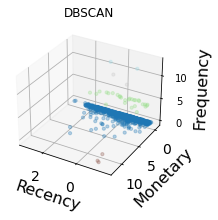

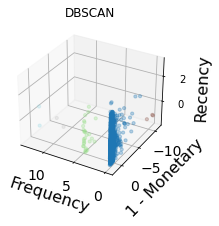

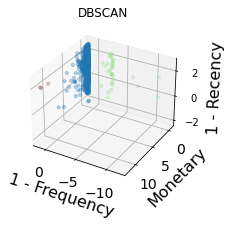

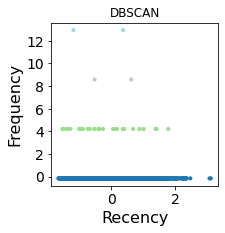

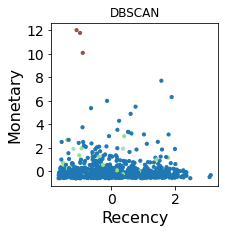

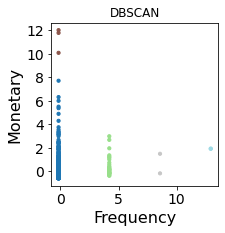

In [18]:
ploot("+r+m+f")
ploot("+f-m+r")
ploot("-f+m-r")
plo2("rf")
plo2("rm")
plo2("fm")

>>-
## 22. Dataset loglogloglog

In [19]:
scaler = StandardScaler()
X = init_classif(df = dfllll, ns = 1000)

(96095, 3) 93355
Il y a 2.9% de clients ayant effectué plus d'un achatdans le dataset avant subsampling.
(1000, 3) 968
Il y a 3.2% de clients ayant effectué plus d'un achatdans la subsample sélectionnée.


In [20]:
for eps in np.logspace(0,1,3):
    for mins in [1,2,3]:
        model = DBSCAN(eps=eps, min_samples=mins)
        db = model.fit(X)
        print("eps:", eps, ", min_samples:", mins, ", # labels:", len(set(db.labels_)))

eps: 1.0 , min_samples: 1 , # labels: 7
eps: 1.0 , min_samples: 2 , # labels: 3
eps: 1.0 , min_samples: 3 , # labels: 3
eps: 3.1622776601683795 , min_samples: 1 , # labels: 3
eps: 3.1622776601683795 , min_samples: 2 , # labels: 3
eps: 3.1622776601683795 , min_samples: 3 , # labels: 3
eps: 10.0 , min_samples: 1 , # labels: 1
eps: 10.0 , min_samples: 2 , # labels: 1
eps: 10.0 , min_samples: 3 , # labels: 1


In [21]:
#model = DBSCAN(eps=.1,min_samples=2)
model = DBSCAN(eps=1,min_samples=2)
y_pred = model.fit_predict(X)
db = model.fit(X)
set(db.labels_)

{-1, 0, 1}

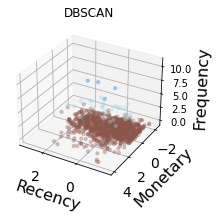

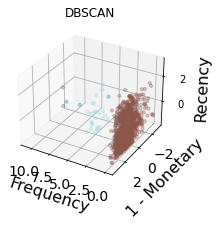

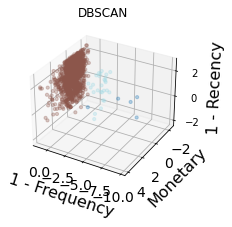

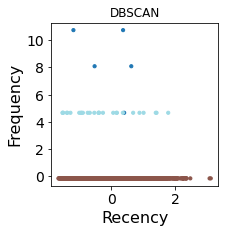

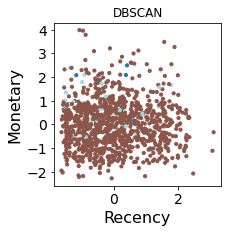

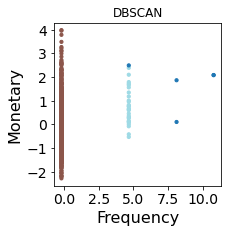

In [22]:
ploot("+r+m+f")
ploot("+f-m+r")
ploot("-f+m-r")
plo2("rf")
plo2("rm")
plo2("fm")

>>-
## 23. Dataset avec review_score

In [23]:
scaler = StandardScaler()
X = init_classif(df = dfrs, cols_num=["R","F","M","S"], ns = 10000)

(95379, 4) 92680
Il y a 2.8% de clients ayant effectué plus d'un achatdans le dataset avant subsampling.
(10000, 4) 9731
Il y a 2.7% de clients ayant effectué plus d'un achatdans la subsample sélectionnée.


In [24]:
for eps in np.logspace(0,1,3):
    for mins in [1,2,3]:
        model = DBSCAN(eps=eps, min_samples=mins)
        db = model.fit(X)
        print("eps:", eps, ", min_samples:", mins, ", # labels:", len(set(db.labels_)))

eps: 1.0 , min_samples: 1 , # labels: 30
eps: 1.0 , min_samples: 2 , # labels: 8
eps: 1.0 , min_samples: 3 , # labels: 5
eps: 3.1622776601683795 , min_samples: 1 , # labels: 12
eps: 3.1622776601683795 , min_samples: 2 , # labels: 8
eps: 3.1622776601683795 , min_samples: 3 , # labels: 6
eps: 10.0 , min_samples: 1 , # labels: 1
eps: 10.0 , min_samples: 2 , # labels: 1
eps: 10.0 , min_samples: 3 , # labels: 1


In [25]:
#model = DBSCAN(eps=.1,min_samples=2)
model = DBSCAN(eps=3,min_samples=3)
y_pred = model.fit_predict(X)
db = model.fit(X)
set(db.labels_)

{-1, 0, 1, 2, 3, 4}

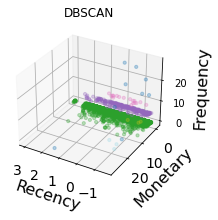

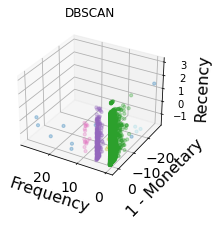

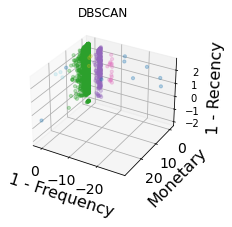

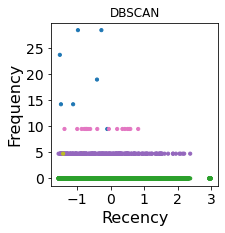

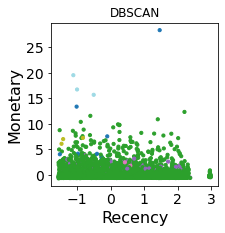

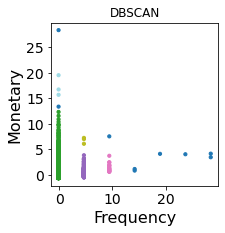

In [26]:
ploot("+r+m+f")
ploot("+f-m+r")
ploot("-f+m-r")
plo2("rf")
plo2("rm")
plo2("fm")

In [27]:
for eps in np.logspace(0,1,3):
    for mins in [10,30,100,300]:
        model = DBSCAN(eps=eps, min_samples=mins)
        db = model.fit(X)
        print("eps:", eps, ", min_samples:", mins, ", # labels:", len(set(db.labels_)))

eps: 1.0 , min_samples: 10 , # labels: 3
eps: 1.0 , min_samples: 30 , # labels: 3
eps: 1.0 , min_samples: 100 , # labels: 2
eps: 1.0 , min_samples: 300 , # labels: 2
eps: 3.1622776601683795 , min_samples: 10 , # labels: 4
eps: 3.1622776601683795 , min_samples: 30 , # labels: 3
eps: 3.1622776601683795 , min_samples: 100 , # labels: 3
eps: 3.1622776601683795 , min_samples: 300 , # labels: 2
eps: 10.0 , min_samples: 10 , # labels: 1
eps: 10.0 , min_samples: 30 , # labels: 2
eps: 10.0 , min_samples: 100 , # labels: 2
eps: 10.0 , min_samples: 300 , # labels: 2


In [28]:
#model = DBSCAN(eps=.1,min_samples=2)
model = DBSCAN(eps=3,min_samples=100)
y_pred = model.fit_predict(X)
db = model.fit(X)
set(db.labels_)

{-1, 0, 1}

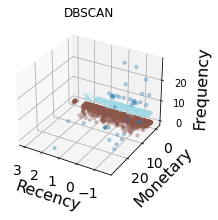

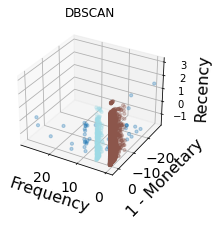

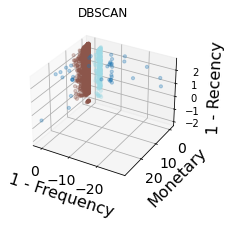

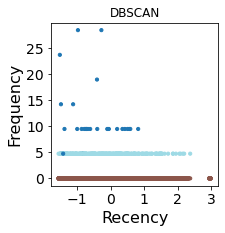

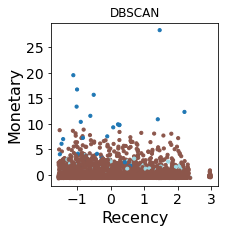

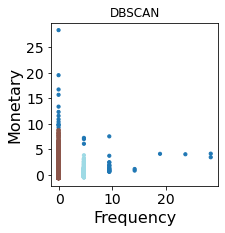

In [29]:
ploot("+r+m+f")
ploot("+f-m+r")
ploot("-f+m-r")
plo2("rf")
plo2("rm")
plo2("fm")

>>-
## 23. Algo OPTICS

In [30]:
scaler = StandardScaler()
X = init_classif(ns=10000)

(96095, 3) 93355
Il y a 2.9% de clients ayant effectué plus d'un achatdans le dataset avant subsampling.
(10000, 3) 9726
Il y a 2.7% de clients ayant effectué plus d'un achatdans la subsample sélectionnée.


In [31]:
for mins in [.5,1,2,3]:
    model = OPTICS(min_samples=mins)
    db = model.fit(X)
    print("min_samples:", mins, ", # labels:", len(set(db.labels_)))

min_samples: 0.5 , # labels: 1
min_samples: 1 , # labels: 1
min_samples: 2 , # labels: 2921
min_samples: 3 , # labels: 1444


OPTICS avec la cluster_method "xi" ne convient pas.

>-
# 3. Tests de classification KMeans

>>-
## 31. Dataset loglogloglog

In [32]:
scaler = StandardScaler()
X = init_classif(df = dfllll)

C:\Users\achou\AppData\Local\Temp\ipykernel_22352\1230886600.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[cols_num] = scaler.fit_transform(X[cols_num])


In [33]:
model = KMeans(n_clusters=8, init="k-means++")
model = model.fit(X)
#y_pred = model.fit_predict(X)
y_pred = model.predict(X)

>>-
## 32. Dataset linéaire

In [37]:
scaler = StandardScaler()
X = init_classif()

C:\Users\achou\AppData\Local\Temp\ipykernel_22352\1230886600.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[cols_num] = scaler.fit_transform(X[cols_num])


In [38]:
model = KMeans(n_clusters=5, init="k-means++")
model = model.fit(X)
#y_pred = model.fit_predict(X)
y_pred = model.predict(X)

C:\Users\achou\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='R', ylabel='M'>

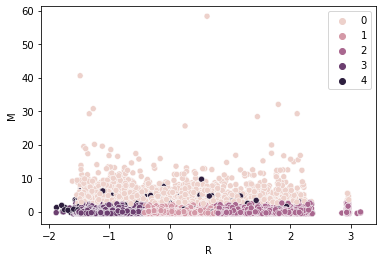

In [45]:
sns.scatterplot(X.R, X.M, y_pred)

>>-
## 33. Dataset avec review_score

In [46]:
scaler = StandardScaler()
X = init_classif(df=dfrs, cols_num=["R","F","M","S"])

In [47]:
model = KMeans(n_clusters=5, init="k-means++")
model = model.fit(X)
#y_pred = model.fit_predict(X)
y_pred = model.predict(X)

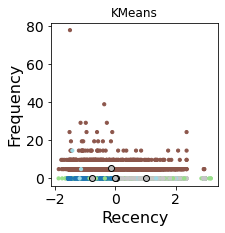

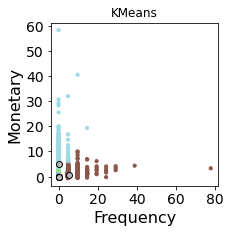

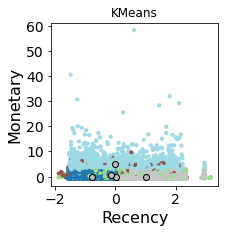

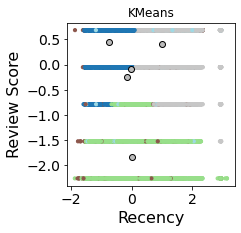

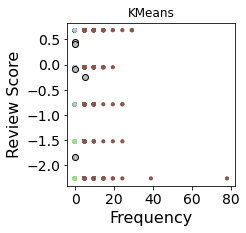

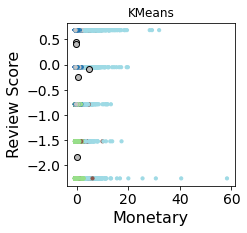

In [48]:
plo2("RF")
plo2("FM")
plo2("RM")
plo2("RS")
plo2("FS")
plo2("MS")

>-
# 4. Recherche du nombre de clusters idéal.

>>-
## 41. Dataset linéaire

In [89]:
subp_dic = {
    'RF'   : ["ax1", "X.R", 0, "X.F", 1],
    'RM'   : ["ax2", "X.R", 0, "X.M", 2],
    'FM'   : ["ax3", "X.F", 1, "X.M", 2],
}
for i in subp_dic.values():
    print(i)

['ax1', 'X.R', 0, 'X.F', 1]
['ax2', 'X.R', 0, 'X.M', 2]
['ax3', 'X.F', 1, 'X.M', 2]


In [121]:
sns.color_palette(palette="nipy_spectral", n_colors=3)

[(0.0, 0.46931372549019607, 0.8667),
 (0.0, 0.7385313725490196, 0.0),
 (1.0, 0.7882352941176471, 0.0)]

In [123]:
sns.color_palette("bright", n_colors=3)

[(0.00784313725490196, 0.24313725490196078, 1.0),
 (1.0, 0.48627450980392156, 0.0),
 (0.10196078431372549, 0.788235294117647, 0.2196078431372549)]

In [137]:
sns.color_palette("bright", n_colors=3, as_cmap=True)

['#023EFF',
 '#FF7C00',
 '#1AC938',
 '#E8000B',
 '#8B2BE2',
 '#9F4800',
 '#F14CC1',
 '#A3A3A3',
 '#FFC400',
 '#00D7FF']

In [99]:
pd.Series([0, 1, 2, 1, 2, 0, 0, 0, 2]).map(dict(zip([0, 1, 2, 3],
                                                    sns.color_palette("bright"))))

0      (0.00784313725490196, 0.24313725490196078, 1.0)
1                      (1.0, 0.48627450980392156, 0.0)
2    (0.10196078431372549, 0.788235294117647, 0.219...
3                      (1.0, 0.48627450980392156, 0.0)
4    (0.10196078431372549, 0.788235294117647, 0.219...
5      (0.00784313725490196, 0.24313725490196078, 1.0)
6      (0.00784313725490196, 0.24313725490196078, 1.0)
7      (0.00784313725490196, 0.24313725490196078, 1.0)
8    (0.10196078431372549, 0.788235294117647, 0.219...
dtype: object

Il y a 2.9% de clients ayant effectué plus d'un achat dans le dataset avant subsampling.
Il y a 2.7% de clients ayant effectué plus d'un achat dans la subsample sélectionnée.
progress: 0.0 % --> 20.0 % --> 40.0 % --> 60.0 % --> 80.0 % --> 100 %


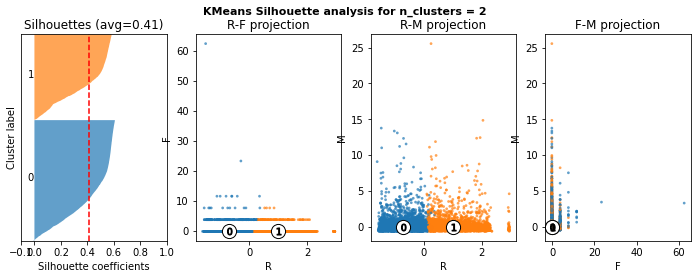

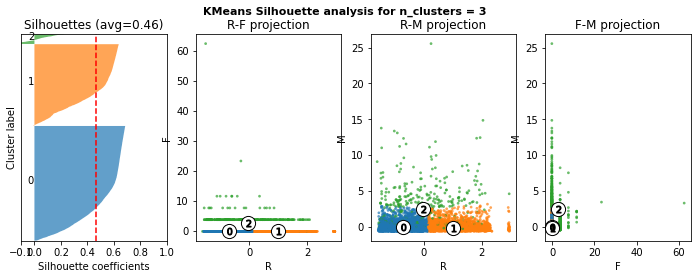

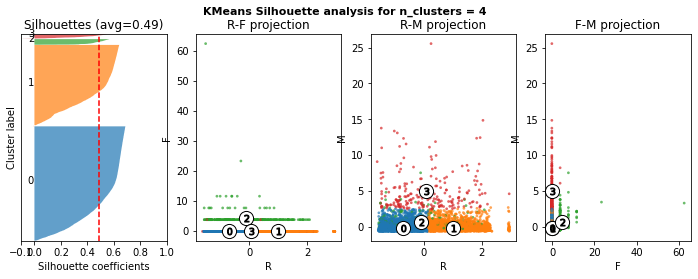

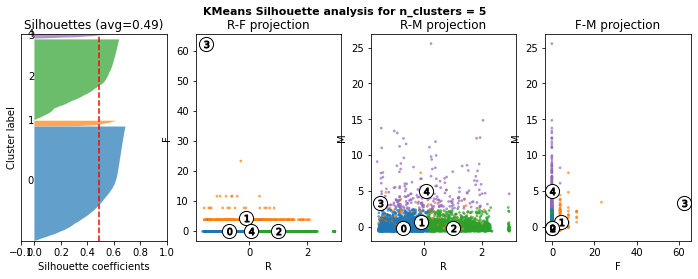

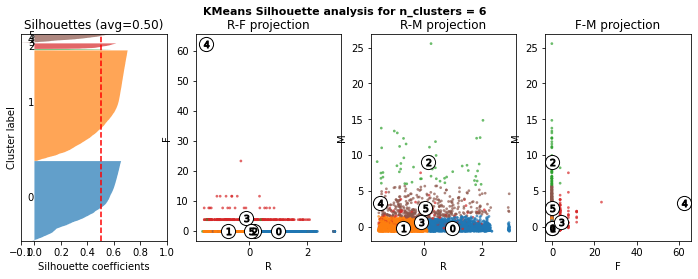

Text(0, 0.5, 'Some des carrés intra-cluster (WCSS)')

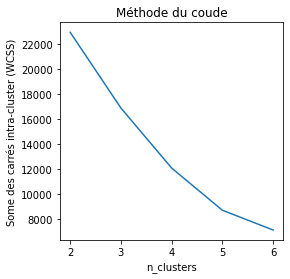

In [153]:
scaler = StandardScaler()
X = init_classif(ns=10000)

wcss = []
range_n_clusters = range(2,7)

print("progress: ", end="")
for loop_step, n_clusters in enumerate(range_n_clusters):
    print(100*loop_step/len(range_n_clusters), "% ", end="--> ")

    y_lower = 10
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4)
    fig.set_size_inches(12, 3.8)
    ax1.set_xlim([-0.07, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1)*10])
    subp_dic = {
        'RF'   : [ax2, X.R, 0, X.F, 1],
        'RM'   : [ax3, X.R, 0, X.M, 2],
        'FM'   : [ax4, X.F, 1, X.M, 2],
    }

    # We set the seed for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_
    # Record wcss for the elbow graph.
    wcss.append(clusterer.inertia_)

    silhouette_avg = silhouette_score(X, cluster_labels)
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[
            cluster_labels == i
        ]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            cmap="tab10",
#            cmap=sns.color_palette("bright", n_colors=n_clusters, as_cmap=True),
#            color=sns.color_palette("bright", n_colors=n_clusters),
            alpha=0.7,
        )
        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10

    ax1.set_title("Silhouettes (avg={a:1.2f})".format(a=silhouette_avg))
    ax1.set_xlabel("Silhouette coefficients")
    ax1.set_ylabel("Cluster label")
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    for sd in subp_dic.values():
        sd[0].scatter(
            sd[1],
            sd[3],
            marker=".",
            s=30,
            lw=0,
            alpha=0.7,
            c=pd.Series(cluster_labels).map(dict(zip(np.unique(cluster_labels),
                                          sns.color_palette(
#                                              "bright",
                                              "tab10",
                                              n_colors=n_clusters,
                                          )))),
            edgecolor="k",
        )

        sd[0].scatter(
            centers[:, sd[2]],
            centers[:, sd[4]],
            marker="o",
            c="white",
            alpha=1,
            s=200,
            edgecolor="k",
        )

        for i, c in enumerate(centers):
            sd[0].scatter(
                c[sd[2]],
                c[sd[4]],
                marker="$%d$" % i,
                alpha=1,
                s=50,
                edgecolor="k",
            )

        sd[0].set_title(sd[1].name + "-" + sd[3].name + " projection")
        sd[0].set_xlabel(sd[1].name)
        sd[0].set_ylabel(sd[3].name)

    plt.suptitle(
        "KMeans Silhouette analysis for n_clusters = %d"
        % n_clusters,
        fontsize=11,
        fontweight="bold",
    )

print(100, "%")
plt.show()

fig = plt.figure(figsize=(4, 4))
plt.plot(range_n_clusters, wcss)
plt.title("Méthode du coude")
plt.xlabel("n_clusters")
plt.ylabel("Some des carrés intra-cluster (WCSS)")

La méthode du coude montre un nombre de clusters optimal de 4.  
L'analyse de silhouette donne également un nombre de clusters optimal de 4.  
Les clusters obtenus sont:
- petit F, petit M, R_scaled > 0 (beaucoup de données)
- petit F, petit M, R_scaled < 0 (beaucoup de données)
- grand F, (petit M ?) (peu de données car comportement de clients plus rare)
- (petit F ?), grand M (peu de données car comportement de clients plus rare)
Le 5è cluster vient séparer les deux larges clusters en 3 de petit F et petit M.  
Le 6è cluster vient séparer le petit cluster de grand M en un cluster de grand M
et un cluster de très grand M.  

>>-
## 41. Dataset avec review_score

Il y a 2.8% de clients ayant effectué plus d'un achat dans le dataset avant subsampling.
Il y a 2.8% de clients ayant effectué plus d'un achat dans la subsample sélectionnée.
progress: 0.0 % --> 20.0 % --> 40.0 % --> 60.0 % --> 80.0 % --> 100 %


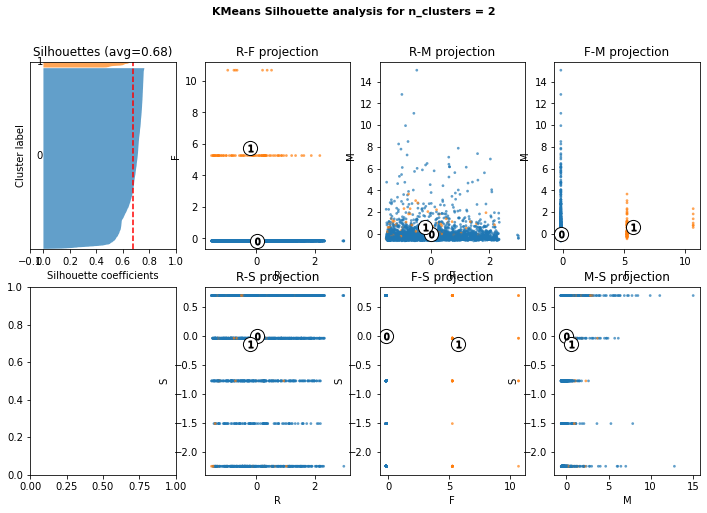

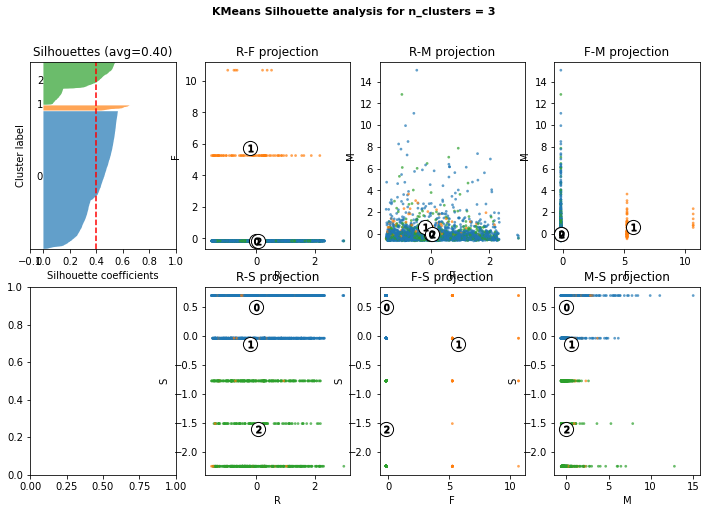

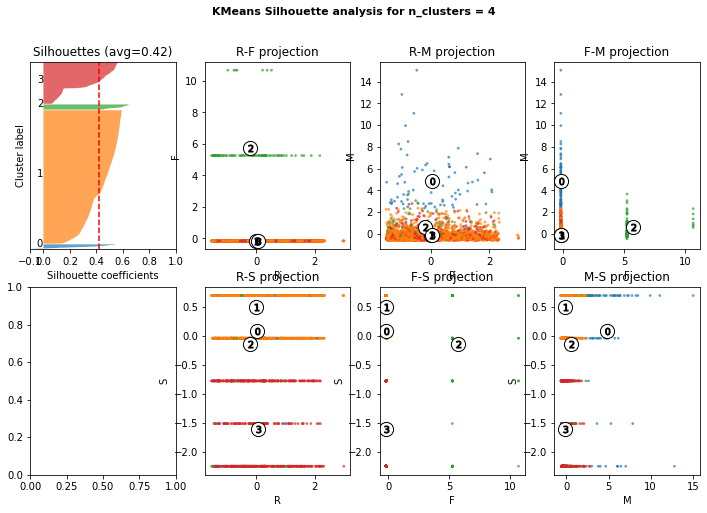

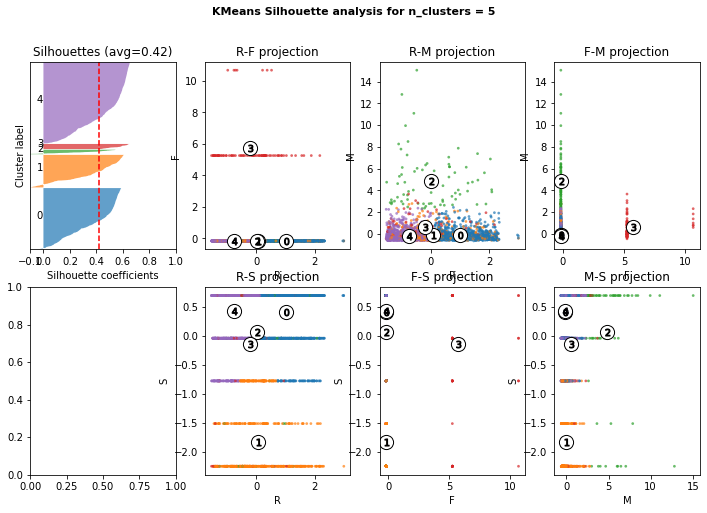

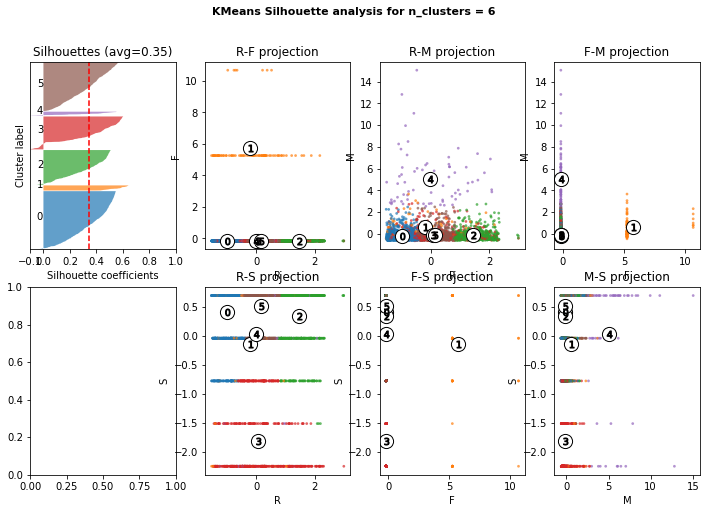

Text(0, 0.5, 'Some des carrés intra-cluster (WCSS)')

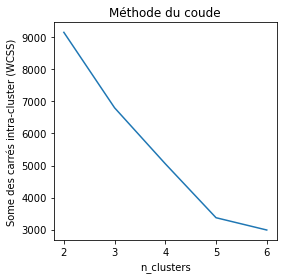

In [156]:
scaler = StandardScaler()
X = init_classif(df=dfrs, cols_num=["R","F","M","S"], ns=3000)

wcss = []
range_n_clusters = range(2,7)

print("progress: ", end="")
for loop_step, n_clusters in enumerate(range_n_clusters):
    print(100*loop_step/len(range_n_clusters), "% ", end="--> ")

    y_lower = 10
    fig, axs = plt.subplots(2, 4)
    fig.set_size_inches(12, 7.6)
    axs[0,0].set_xlim([-0.07, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    axs[0,0].set_ylim([0, len(X) + (n_clusters + 1)*10])
    subp_dic = {
        "RF"   : [axs[0,1], X.R, 0, X.F, 1],
        "RM"   : [axs[0,2], X.R, 0, X.M, 2],
        "FM"   : [axs[0,3], X.F, 1, X.M, 2],
        "RS"   : [axs[1,1], X.R, 0, X.S, 3],
        "FS"   : [axs[1,2], X.F, 1, X.S, 3],
        "MS"   : [axs[1,3], X.M, 2, X.S, 3],
    }

    # We set the seed for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_
    # Record wcss for the elbow graph.
    wcss.append(clusterer.inertia_)

    silhouette_avg = silhouette_score(X, cluster_labels)
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[
            cluster_labels == i
        ]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        axs[0,0].fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            cmap="tab10",
#            cmap=sns.color_palette("bright", n_colors=n_clusters, as_cmap=True),
#            color=sns.color_palette("bright", n_colors=n_clusters),
            alpha=0.7,
        )
        # Label the silhouette plots with their cluster numbers at the middle
        axs[0,0].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10

    axs[0,0].set_title("Silhouettes (avg={a:1.2f})".format(a=silhouette_avg))
    axs[0,0].set_xlabel("Silhouette coefficients")
    axs[0,0].set_ylabel("Cluster label")
    axs[0,0].set_yticks([])  # Clear the yaxis labels / ticks
    axs[0,0].set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    axs[0,0].axvline(x=silhouette_avg, color="red", linestyle="--")

    for sd in subp_dic.values():
        sd[0].scatter(
            sd[1],
            sd[3],
            marker=".",
            s=30,
            lw=0,
            alpha=0.7,
            c=pd.Series(cluster_labels).map(dict(zip(np.unique(cluster_labels),
                                          sns.color_palette(
#                                              "bright",
                                              "tab10",
                                              n_colors=n_clusters,
                                          )))),
            edgecolor="k",
        )

        sd[0].scatter(
            centers[:, sd[2]],
            centers[:, sd[4]],
            marker="o",
            c="white",
            alpha=1,
            s=200,
            edgecolor="k",
        )

        for i, c in enumerate(centers):
            sd[0].scatter(
                c[sd[2]],
                c[sd[4]],
                marker="$%d$" % i,
                alpha=1,
                s=50,
                edgecolor="k",
            )

        sd[0].set_title(sd[1].name + "-" + sd[3].name + " projection")
        sd[0].set_xlabel(sd[1].name)
        sd[0].set_ylabel(sd[3].name)

    plt.suptitle(
        "KMeans Silhouette analysis for n_clusters = %d"
        % n_clusters,
        fontsize=11,
        fontweight="bold",
    )

print(100, "%")
plt.show()

fig = plt.figure(figsize=(4, 4))
plt.plot(range_n_clusters, wcss)
plt.title("Méthode du coude")
plt.xlabel("n_clusters")
plt.ylabel("Some des carrés intra-cluster (WCSS)")

>-
# 5. Stabilité du KMeans à 4 clusters avec review_score

In [ ]:
scaler = StandardScaler()
X = init_classif(df=dfrs, cols_num=["R","F","M","S"])

In [ ]:
model = KMeans(n_clusters=4, init="random")
model = model.fit(X)
#y_pred = model.fit_predict(X)
y_pred = model.predict(X)

In [ ]:
plo2("RF")
plo2("FM")
plo2("RM")
plo2("RS")
plo2("FS")
plo2("MS")

In [ ]:
#X = scalers[2].inverse transfomr

In [ ]:
dfstat = dfrs.copy()
dfstat["label"] = pd.Series(y_pred) #model.labels_
dfstat.groupby("label").mean()

In [ ]:
stats = pd.DataFrame(columns = [
    "cluster",
    "","center_coords","",
    "","",
    "cluster_std","","",
    "n_clients",
    ])
for i, j in enumerate(pd.Series(y_pred).unique()):
    clust = X.reset_index()[pd.Series(y_pred) == j]
    stats.loc[i] = [
        j,
        model.cluster_centers_[i][0], model.cluster_centers_[i][1],
        model.cluster_centers_[i][2], model.cluster_centers_[i][3],
        clust.R.std(), clust.F.std(), clust.M.std(), clust.S.std(),
        clust.shape[0],
    ]
stats

loop ça avec init="random" et comparer les ```n_clients[i]``` obtenus
à chaque run

>-
# 6. Durée de vie du clustering

Dans un autre notebook: ARI et silhouette(t) (et coude(t) ?)

In [ ]:
#sklearn.metrics.adjusted_rand_score
#sklearn.cluster.KernelKMeans

>-
# 7. DBSCAN

>-
# 8. Agglomerative/hierarchical clustering

In [ ]:
model = AgglomerativeClustering(n_clusters=4)
y_pred = model.fit_predict(X)
db = model.fit(X)
set(db.labels_)

In [ ]:
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(projection='3d')
ax.scatter(X.R, X.M, X.F, c=y_pred, cmap="tab20")
plt.title("Agg Clustering")
plt.xlabel("Recency",fontsize=16)
plt.xticks(fontsize=14)
plt.ylabel("Monetary",fontsize=16)
plt.yticks(fontsize=14)
ax.set_zlabel("Frequency",fontsize=16)
#ax.set_zticks(fontsize=14)
plt.legend